In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn as nn
from torchcam.cams import SmoothGradCAMpp, SSCAM, ScoreCAM
from neural_network.trainer import Agent
from skimage.transform import resize

import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [4]:
agent = Agent('resnet50');

Setup configurations...
Dataset sizes - Training: 421 Validation: 47 Test: 0
Loading architecture from logs/tb_logs/lightning/resnet50/version_2/checkpoints/epoch=34-step=2424.ckpt (checkpoint)..
Model [LightningModel] was created
logs/tb_logs/


GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [5]:
#agent.fit()

# Imports

In [6]:
import torch
from torchcam.cams import SmoothGradCAMpp

# Setup Input!

In [7]:
agent.load_model()

Loading architecture from logs/tb_logs/lightning/resnet50/version_2/checkpoints/epoch=34-step=2424.ckpt (checkpoint)..


GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Model [LightningModel] was created
logs/tb_logs/


In [19]:
from neural_network.cam.cam import get_cam
from neural_network.utils.cam_plots import plot_CAM_grid
from neural_network.utils import move_to_device, to_cpu_numpy
from neural_network.utils import interactive_slices, interactive_slices_masked
def cam_example(agent, extractor_name='SmoothGradCAMpp',img_size=(79,224,224), plot_type='grid'):
    label = 0
    cn_img = nib.load('data/SPM_categorised/AIH/CN/CN_ADNI_998.nii').get_fdata()
    mci_img = nib.load('data/SPM_categorised/AIH/MCI/MCI_ADNI_1586.nii').get_fdata()
    ad_img = nib.load('data/SPM_categorised/AIH/AD/AD_ADNI_2975.nii').get_fdata()
    
    cn_img = torch.from_numpy(resize(cn_img, img_size)).float()
    mci_img = torch.from_numpy(resize(mci_img, img_size)).float()
    ad_img = torch.from_numpy(resize(ad_img, img_size)).float()
    model = agent.model
    
    cn_img = resize(cn_img, img_size)
    cn_img = torch.from_numpy(cn_img)
    model, cn_img = move_to_device(model, cn_img, 'cuda')
    mask = get_cam(model, cn_img, extractor_name=extractor_name)
    
    if plot_type == 'grid':
        plot_CAM_grid(to_cpu_numpy(cn_img), mask)
    elif plot_type == 'slice':
        testplot = interactive_slices()
        testplot.multi_slice_viewer(to_cpu_numpy(cn_img))
        #testplot.cycle(0.1)
    elif plot_type == 'slice_masked':
        testplot = interactive_slices_masked()
        testplot.multi_slice_viewer(to_cpu_numpy(cn_img), mask)
        #testplot.cycle(1)
        

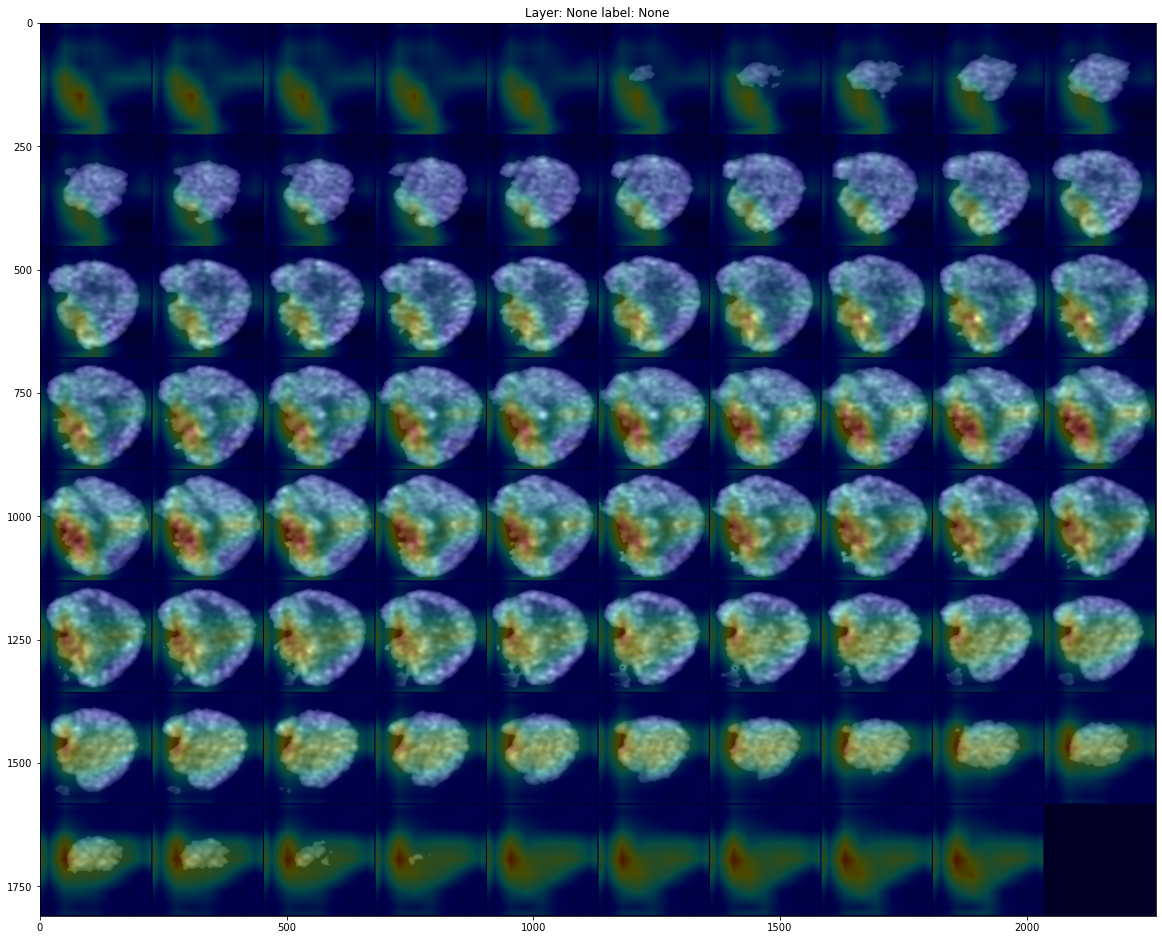

In [9]:
cam_example(agent)

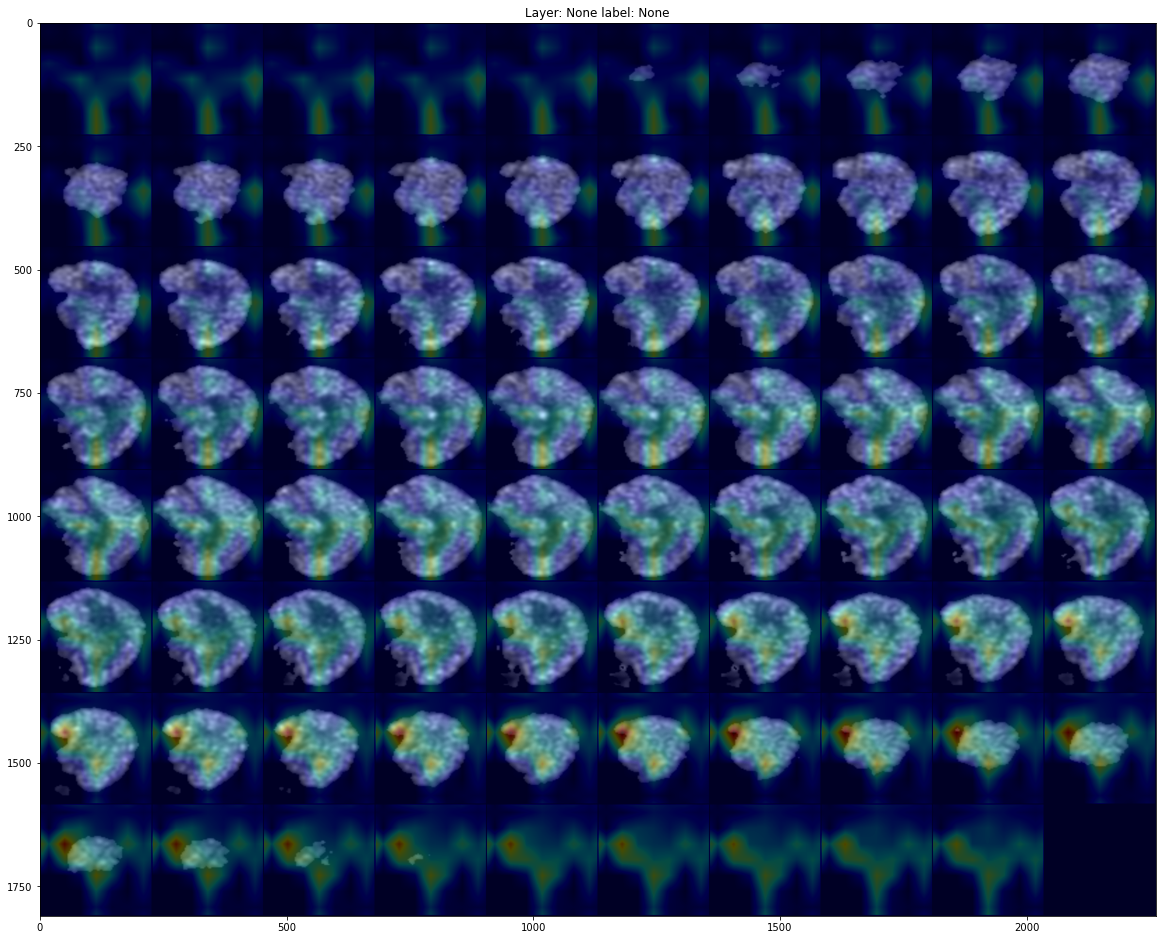

In [10]:
cam_example(agent,extractor_name='GradCAM')

In [21]:
%matplotlib widget
cam_example(agent,extractor_name='GradCAM', plot_type='slice_masked')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Got here!


In [12]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
plt.imshow((first_image[0].squeeze(0)[50] * 255).numpy().astype(np.uint8), cmap='gray')
plt.imshow((darp[50] * 255).astype(np.uint8), cmap='jet', alpha=0.3)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'first_image' is not defined

In [ ]:
from neural_network.utils.utils import interactive_slices
testplot = interactive_slices()
testplot.multi_slice_viewer(darp)

In [ ]:
from neural_network.cam.cam import SmoothGradCAMpp

In [ ]:
wrapped_model = SmoothGradCAMpp(model,target_layer=model.model.layer4[1].conv2)

In [ ]:
first_image[0].unsqueeze(0).shape

In [ ]:
model.eval()
cam, idx = wrapped_model(first_image[0].unsqueeze(0))